In [11]:
import pandas as pd

In [12]:
spotify = pd.read_csv('data.csv', sep=',')

In [13]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
spotify_train, spotify_test = train_test_split(spotify, test_size=0.3, 
                                                random_state=42)

print(spotify_train.shape, spotify_test.shape)

(122072, 19) (52317, 19)


In [16]:
from sklearn.tree import DecisionTreeClassifier

features = ['tempo']
dt_classification = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt_classification.fit(spotify_train[features], spotify_train['year'])

DecisionTreeClassifier(max_depth=3)

In [17]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [18]:
predictionsOnTrainSet = dt_classification.predict(spotify_train[features])
predictionsOnTestSet = dt_classification.predict(spotify_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainSet, spotify_train['year'])
accuracyTest = calculate_accuracy(predictionsOnTestSet, spotify_test['year'])

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.026672783275444
Accuracy on test set 0.025995374352504923


Accuracy is bijna hetzelfde, trainig heeft iets hogere accuracy wat is verwacht

In [19]:
from sklearn import tree

def plot_tree_classification(model, features, class_names):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          class_names=class_names,
                          filled=True)
    
    # display in the notebook
    return graph


[Text(1395.0, 2378.25, "tempo <= 119.837\ngini = 0.989\nsamples = 122072\nvalue = [238, 116, 80, 119, 171, 182, 914, 528, 898, 667\n1290, 679, 529, 495, 389, 1085, 1378, 465, 433, 697\n1337, 652, 1198, 524, 549, 1403, 1217, 1185, 1409\n1383, 1430, 1394, 1394, 1429, 1399, 1397, 1448, 1414\n1402, 1417, 1399, 1362, 1382, 1385, 1381, 1416, 1127\n1399, 1429, 1423, 1436, 1411, 1405, 1407, 1382, 1423\n1338, 1411, 1398, 1395, 1430, 1442, 1427, 1397, 1410\n1400, 1404, 1419, 1425, 1389, 1417, 1488, 1362, 1411\n1411, 1408, 1423, 1435, 1406, 1417, 811, 668, 1401\n865, 745, 935, 953, 974, 1184, 1080, 1378, 1298\n1358, 1814, 1551, 1602, 1680, 1535, 1896, 1624, 3020\n1336]\nclass = ['Sergei Rachmaninoff', 'Ruth Laredo']"),
 Text(697.5, 1698.75, "tempo <= 87.521\ngini = 0.989\nsamples = 66850\nvalue = [130, 85, 60, 67, 89, 102, 617, 375, 652, 441, 874\n451, 338, 291, 220, 717, 934, 267, 269, 429, 915\n427, 809, 351, 352, 925, 878, 741, 935, 897, 901\n885, 923, 951, 931, 899, 935, 903, 890, 901, 887\n8

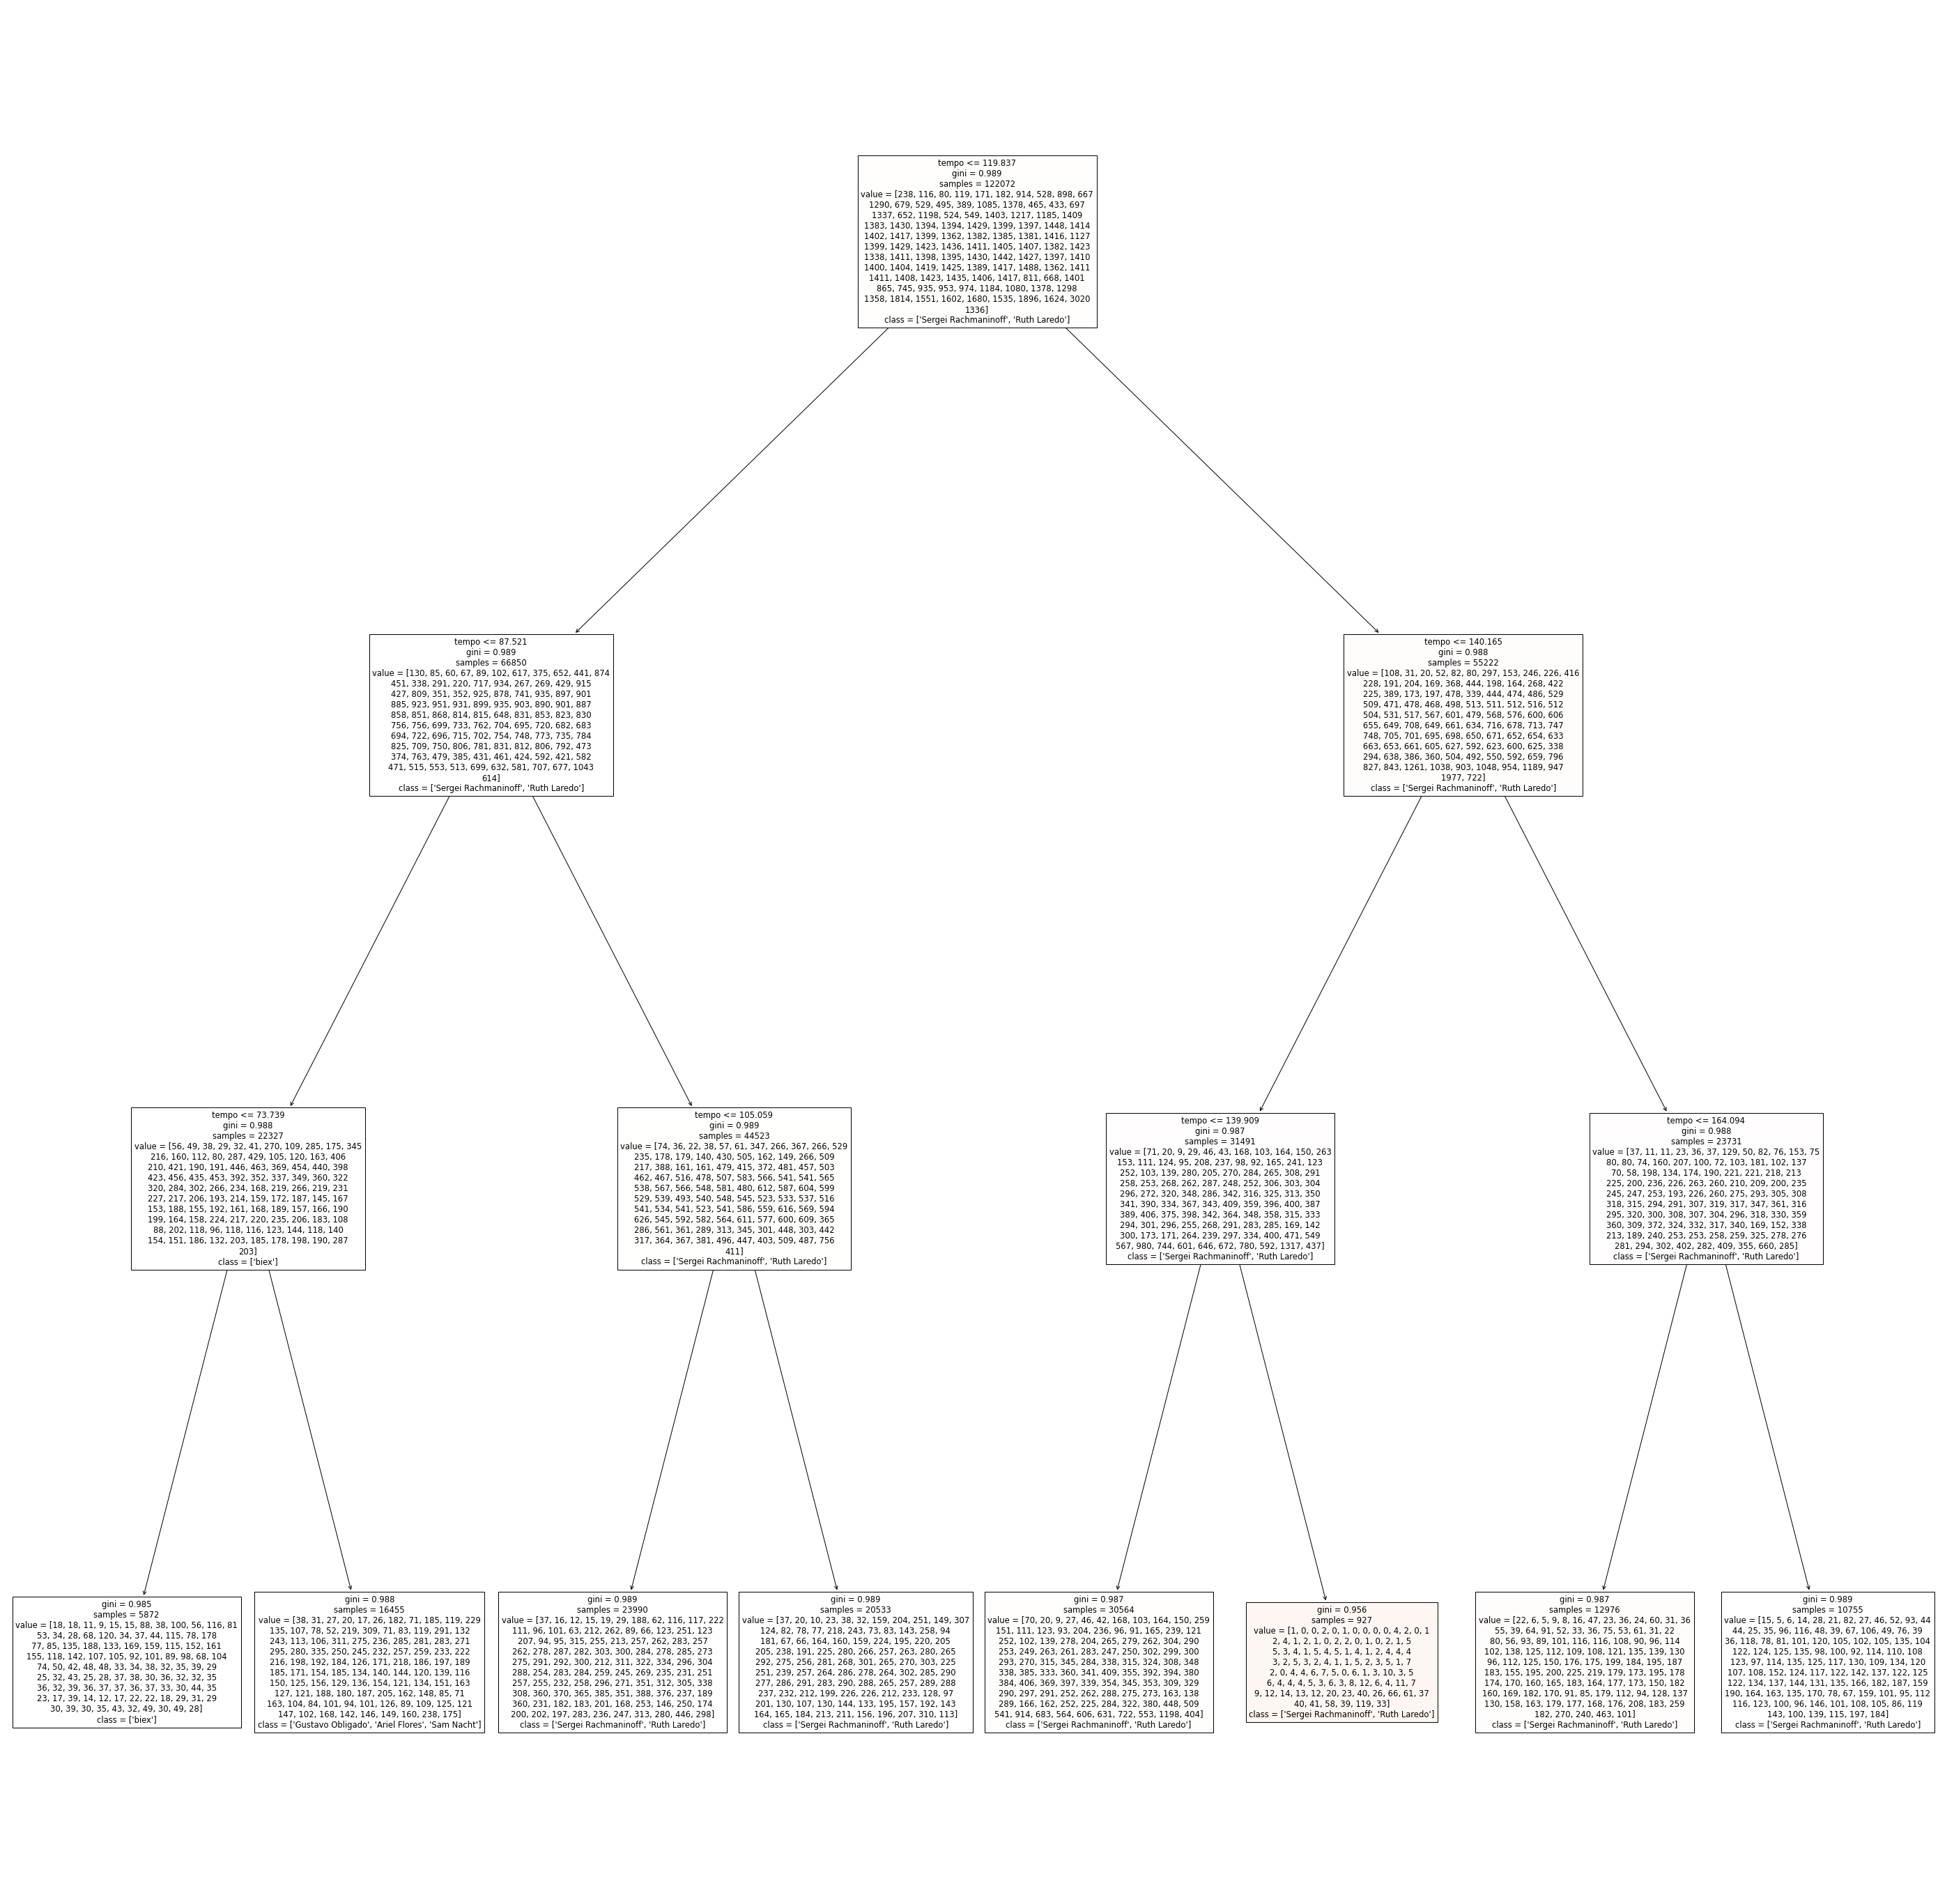

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))

plot_tree_classification(dt_classification, features, spotify["artists"].unique())

Vanuit normale settings zie je niet veel van de tree maar als je inzoomt kan je meer zien